In [0]:
!pip install tensorflow-gpu

In [2]:
# Checks and setup
import tensorflow as tf
import os

print(tf.__version__)

2.0.0


## Eager execution

Since eager execution is enabled by default in TensorFlow 2.0 you _do not_ need to do anything to enable it. However, you can disable it by executing the following:

```python
import tensorflow as tf

tf.compat.v1.disable_eager_execution()
```

If you want to know whether eager execution is enabled or not just execute `tf.executing_eagerly()`. 

## GradientTape

## Part I

In [3]:
a = tf.Variable(tf.random.normal(shape=(2, 2)))
b = tf.random.normal(shape=(2, 2))

with tf.GradientTape() as tape:
    c = tf.sqrt(tf.square(a) + tf.square(b))  
    # Gradient of `c` w.r.t `a`
    dc_da = tape.gradient(c, a)
    print(dc_da)

tf.Tensor(
[[-0.76125926 -0.8547008 ]
 [-0.95074195  0.8155739 ]], shape=(2, 2), dtype=float32)


## Part II

In [0]:
# Imports
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import time

In [5]:
# Generate some data
X, y = make_blobs(n_samples=100, centers=2, n_features=2,
                  random_state=666)

X.shape, y.shape

((100, 2), (100,))

In [6]:
X[:10], y[:10]

(array([[2.34769665, 3.84737956],
        [2.25211721, 7.72836548],
        [4.20334204, 8.19437057],
        [4.56840252, 5.00758839],
        [5.14209854, 8.60577994],
        [5.3476516 , 4.49482029],
        [0.77015549, 4.84023746],
        [3.93882207, 7.52922765],
        [4.41391444, 2.56506757],
        [3.40315224, 8.62298395]]), array([1, 0, 0, 1, 0, 1, 1, 0, 1, 0]))

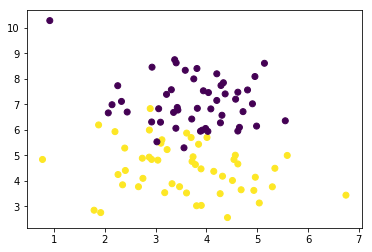

In [7]:
# Plot the data
plt.scatter(X[:, 0], X[:, 1], c=y.reshape((100,1))[:, 0])
plt.show()

In [0]:
# Define a model to fit the above data
model = tf.keras.Sequential([
    tf.keras.layers.Dropout(rate=0.2, input_shape=X.shape[1:]),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

In [0]:
# Define loss and optimizer
loss_func = tf.keras.losses.BinaryCrossentropy()
optimizer = tf.keras.optimizers.Adam()

In [0]:
@tf.function
def train_loop(features, labels):
    # Define the GradientTape context
    with tf.GradientTape() as tape:
        # Get the probabilities
        predictions = model(features)
        # Calculate the loss
        loss = loss_func(labels, predictions)
    # Get the gradients
    gradients = tape.gradient(loss, model.trainable_variables)
    # Update the weights
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    return loss

In [0]:
# Shuffle the data
indices = np.random.permutation(len(X))
features = X[indices]
labels = y[indices]

# Create batches of data
dataset = tf.data.Dataset.from_tensor_slices((features, labels))
dataset = dataset.shuffle(buffer_size=1024).batch(16)

In [0]:
# Train the model
def train_model():
    start = time.time()
    for epoch in range(10):
        for step, (x, y) in enumerate(dataset):
            loss = train_loop(x, y)
            print('Epoch %d: last batch loss = %.4f' % (epoch, float(loss)))
    print("It took {} seconds".format(time.time() - start))

In [13]:
train_model()


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Epoch 0: last batch loss = 0.8985
Epoch 0: last batch loss = 0.6993
Epoch 0: last batch loss = 0.8309
Epoch 0: last batch loss = 0.7734
Epoch 0: last batch loss = 0.7254
Epoch 0: last batch loss = 0.7579
Epoch 0: last batch loss = 0.7253
Epoch 1: last batch loss = 0.6860
Epoch 1: last batch loss = 0.7291
Epoch 1: last batch loss = 0.7001
Epoch 1: last batch loss = 0.7077
Epoch 1: last batch loss = 0.6907
Epoch 1: last batch loss = 0.6767
Epoch 1: last batch loss = 0.6743
Epoch 2: last batch loss = 0.647

## Without `tf.function`

In [0]:
def train_loop(features, labels):
    # Define the GradientTape context
    with tf.GradientTape() as tape:
        # Get the probabilities
        predictions = model(features)
        # Calculate the loss
        loss = loss_func(labels, predictions)
    # Get the gradients
    gradients = tape.gradient(loss, model.trainable_variables)
    # Update the weights
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    return loss

In [15]:
train_model()

Epoch 0: last batch loss = 0.6219
Epoch 0: last batch loss = 0.6485
Epoch 0: last batch loss = 0.6242
Epoch 0: last batch loss = 0.5949
Epoch 0: last batch loss = 0.5445
Epoch 0: last batch loss = 0.6175
Epoch 0: last batch loss = 0.5613
Epoch 1: last batch loss = 0.5783
Epoch 1: last batch loss = 0.5972
Epoch 1: last batch loss = 0.5862
Epoch 1: last batch loss = 0.6051
Epoch 1: last batch loss = 0.6145
Epoch 1: last batch loss = 0.6144
Epoch 1: last batch loss = 0.5889
Epoch 2: last batch loss = 0.5653
Epoch 2: last batch loss = 0.6612
Epoch 2: last batch loss = 0.5836
Epoch 2: last batch loss = 0.5821
Epoch 2: last batch loss = 0.6220
Epoch 2: last batch loss = 0.5184
Epoch 2: last batch loss = 0.6415
Epoch 3: last batch loss = 0.7204
Epoch 3: last batch loss = 0.5426
Epoch 3: last batch loss = 0.6066
Epoch 3: last batch loss = 0.5415
Epoch 3: last batch loss = 0.5652
Epoch 3: last batch loss = 0.5460
Epoch 3: last batch loss = 0.5973
Epoch 4: last batch loss = 0.6444
Epoch 4: last 

Slower!

## Model subclassing

In [0]:
class LeNet(tf.keras.Model):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv2d_1 = tf.keras.layers.Conv2D(filters=6, 
                           kernel_size=(3, 3), activation='relu', 
                           input_shape=(32,32,1))
        self.average_pool = tf.keras.layers.AveragePooling2D()
        self.conv2d_2 = tf.keras.layers.Conv2D(filters=16, 
                           kernel_size=(3, 3), activation='relu')
        self.flatten = tf.keras.layers.Flatten()
        self.fc_1 = tf.keras.layers.Dense(120, activation='relu')
        self.fc_2 = tf.keras.layers.Dense(84, activation='relu')
        self.out = tf.keras.layers.Dense(10, activation='softmax')
        
    def call(self, input):
        x = self.conv2d_1(input)
        x = self.average_pool(x)
        x = self.conv2d_2(x)
        x = self.average_pool(x)
        x = self.flatten(x)
        x = self.fc_2(self.fc_1(x))
        return self.out(x)
    
lenet = LeNet()

## Distributed training

Currently, for `tf.keras` [MirroredStrategy](https://www.tensorflow.org/guide/distributed_training#mirroredstrategy) works the best (reference: https://www.tensorflow.org/guide/distributed_training#types_of_strategies). We first need to define the strategy with which we want to train our model:

In [0]:
strategy = tf.distribute.MirroredStrategy()

In [18]:
# Since I don't have multiple GPUs :P
print('Number of devices: {}'.format(strategy.num_replicas_in_sync))

Number of devices: 1


In [19]:
# Call the distribution scope context manager
with strategy.scope():
    # Define a model to fit the above data
    model = tf.keras.Sequential([
        tf.keras.layers.Dropout(rate=0.2, input_shape=X.shape[1:]),
        tf.keras.layers.Dense(units=64, activation='relu'),
        tf.keras.layers.Dropout(rate=0.2),
        tf.keras.layers.Dense(units=1, activation='sigmoid')
    ])
    
    # Compile the model
    model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).


In [20]:
# Train the model
model.fit(X, y, epochs=5)

Train on 100 samples
Epoch 1/5
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
100/100 [==============================] - 2s 18ms/sample - loss: 0.8513 - accuracy: 0.5000
Epoch 2/5
100/100 [==============================] - 0s 265us/sample - loss: 0.7999 - accuracy: 0.3900
Epoch 3/5
100/100 [==============================] - 0s 226us/sample - loss: 0.7113 - accuracy: 0.5200
Epoch 4/5
100/100 [==============================] - 0s 252us/sample - loss: 0.7807 - accuracy: 0.3900
Epoch 5/